In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.DataFrame(data_dict)

In [21]:
df = df.transpose()
df.drop(['TOTAL'], inplace = True)
df.tail(50)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
MEYER ROCKFORD G,NaN,1848227,NaN,NaN,rockford.meyer@enron.com,493489,NaN,28,0,0,...,NaN,NaN,False,462384,NaN,NaN,22,232,1848227,955873
MORAN MICHAEL P,NaN,NaN,NaN,NaN,michael.moran@enron.com,59539,NaN,19,0,0,...,NaN,NaN,False,161602,NaN,NaN,127,672,NaN,221141
MORDAUNT KRISTINA M,325000,NaN,NaN,NaN,kristina.mordaunt@enron.com,NaN,35018,NaN,NaN,NaN,...,NaN,1411,False,208510,NaN,267093,NaN,NaN,628522,208510
MULLER MARK S,1100000,842924,-719000,NaN,s..muller@enron.com,1056320,NaN,16,12,0,...,1725545,947,False,360528,NaN,251654,114,136,3202070,1416848
MURRAY JULIA H,400000,NaN,NaN,NaN,julia.murray@enron.com,400478,57580,45,11,2,...,125000,330,False,196983,NaN,229284,395,2192,812194,597461
NOLES JAMES L,NaN,774401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,463261,-94556,NaN,NaN,NaN,774401,368705
OLSON CINDY K,750000,77716,NaN,NaN,cindy.olson@enron.com,1637034,63791,52,20,15,...,100000,972,False,969729,NaN,329078,856,1184,1321557,2606763
OVERDYKE JR JERE C,NaN,NaN,NaN,NaN,jere.overdyke@enron.com,5266578,18834,NaN,NaN,NaN,...,135836,176,False,2041016,NaN,94941,NaN,NaN,249787,7307594
PAI LOU L,1000000,NaN,NaN,NaN,lou.pai@enron.com,15364167,32047,NaN,NaN,NaN,...,NaN,1829457,False,8453763,NaN,261879,NaN,NaN,3123383,23817930
PEREIRA PAULO V. FERRAZ,NaN,NaN,-101250,101250,NaN,NaN,27942,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,27942,NaN


In [22]:
df_poi= df[df['poi']==True]

In [23]:
df_nonpoi = df[df['poi']==False]

In [24]:
fields = df.columns

In [25]:
fields.tolist()

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [26]:
fields = fields.tolist()

In [27]:
fields.remove('email_address')

In [28]:
fields.remove('poi')

In [29]:
for field in fields:
    try:
        df_poi[field] = df_poi[field].astype(float)
    except Exception as e:
        print(e)

C:\Users\Will Koehrsen\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [30]:
for field in fields:
    try:
        df_nonpoi[field] = df_nonpoi[field].astype(float)
    except Exception as e:
        print(e)

C:\Users\Will Koehrsen\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


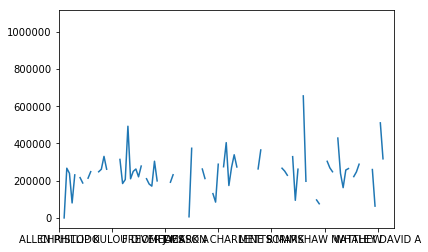

In [31]:
df_nonpoi['salary'].plot()

In [32]:
df_poi['from_ratio'] = df_poi['from_this_person_to_poi'] / df_poi['from_messages']
df_poi['to_ratio'] = df_poi['from_poi_to_this_person'] / df_poi['to_messages']

C:\Users\Will Koehrsen\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Will Koehrsen\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [33]:
df_nonpoi['from_ratio'] = df_nonpoi['from_this_person_to_poi'] / df_nonpoi['from_messages']
df_nonpoi['to_ratio'] = df_nonpoi['from_poi_to_this_person'] / df_nonpoi['to_messages']

C:\Users\Will Koehrsen\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Will Koehrsen\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


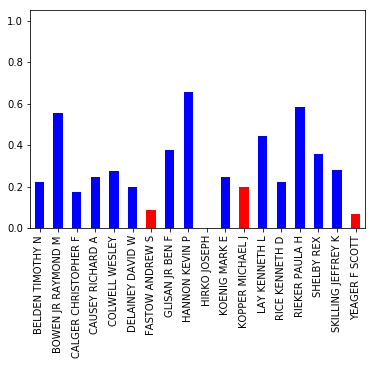

In [34]:
fig = plt.figure()
ax1 = plt.subplot(111)
df_nonpoi['from_ratio'].plot(kind='bar', color = 'red', ax = ax1)
df_poi['from_ratio'].plot(kind='bar', color = 'blue', ax = ax1)
plt.show()

In [35]:
print(np.mean(df_nonpoi['from_ratio']))
print(np.mean(df_poi['from_ratio']))

0.152669361977
0.345469813626


In [36]:
print(np.mean(df_nonpoi['to_ratio']))
print(np.mean(df_poi['to_ratio']))

0.0361072546128
0.0475067013416


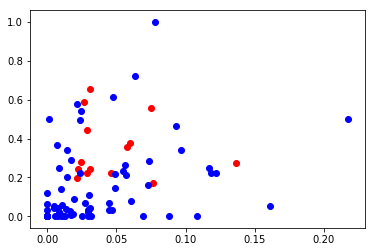

In [37]:
plt.scatter(x = df_poi['to_ratio'] , y = df_poi['from_ratio'], color='red')
plt.scatter(x = df_nonpoi['to_ratio'] , y = df_nonpoi['from_ratio'], color='blue')

In [38]:
for field in fields:
    try:
        df[field] = df[field].astype(float)
    except Exception as e:
        print(e)

In [39]:
df['from_ratio'] = df['from_poi_to_this_person'] / df['to_messages']

In [40]:
df['to_ratio'] = df['from_this_person_to_poi'] / df['from_messages']

In [41]:
df['shared_ratio'] = df['shared_receipt_with_poi'] / df['to_messages']

In [42]:
df = df.dropna(subset=['to_ratio', 'from_ratio', 'shared_ratio'])

IndexError: single positional indexer is out-of-bounds

In [54]:
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDClassifier

In [79]:
df['from_ratio'] = scale(df['from_ratio'])
df['to_ratio'] = scale(df['to_ratio'])
df['shared_ratio'] = scale(df['shared_ratio'])

In [98]:
np.mean(df['shared_ratio'])

1.1069956321117113e-16

In [80]:
data_dict = df.transpose().to_dict()

In [81]:
features_list = ['poi', 'to_ratio', 'from_ratio', 'shared_ratio']

In [82]:
data = featureFormat(data_dict, features_list)

In [83]:
labels, features = targetFeatureSplit(data)

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25)

In [99]:
clf = DecisionTreeClassifier()
#clf = SGDClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [100]:
pred = clf.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, classification_report

In [103]:
accuracy = accuracy_score(y_test, pred)

In [104]:
accuracy

0.72727272727272729

In [105]:
accuracy = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))

In [107]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       1.00      0.90      0.95        21
        1.0       0.33      1.00      0.50         1

avg / total       0.97      0.91      0.93        22



In [108]:
clf.classes_

array([ 0.,  1.])

In [109]:
pred

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [95]:
y_test

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]